In [37]:
# data_dir = "DATA/bn_sentiment.csv"
data_dir = "DATA/racism_v4.json"

In [53]:
import pandas as pd
import re
import random
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

In [51]:
def load_json_data(data_path):
    return pd.read_json(data_path)
    
def load_data(data_path):
    return pd.read_csv(data_path)

def plot_data_distribution(data_frame,column_name):
    emotion_counts = data_frame[column_name].value_counts()

    fig = plt.figure(figsize= (12, 5))
    ax = fig.add_subplot(111)
    sns.barplot(x = emotion_counts.index, y = emotion_counts )

    for a, p in enumerate(ax.patches):
        ax.annotate(format(p.get_height(), '.0f'), xy = (p.get_x() + p.get_width() / 2.0, p.get_height()), xytext = (0,-15), size = 8, color = 'white' , ha = 'center', va = 'center', textcoords = 'offset points', bbox = dict(boxstyle = 'round', facecolor='none',edgecolor='white', alpha = 0.5) )

    plt.xlabel('Emotions', size = 15)
    plt.ylabel('Number of Emotions', size= 15)
    plt.xticks(size = 12)
    plt.title("Emotion Distribution" , size = 18)
    plt.show()

def drop_duplicates_data(data_frame,column_name):
    print(f"DATA Count before dropping: {data_frame.shape}")
    filtered_df = data_frame.drop_duplicates(subset=[column_name], keep='first')
    print(f"DATA Count after dropping: {filtered_df.shape}")
    return filtered_df


def plot_most_frequent_words(df,text_col,cat_col, category):
    # Filter the DataFrame to include only rows with the specified category
    filtered_df = df[df[cat_col] == category]

    # Concatenate all the text in the 'text' column for the selected category
    text = ' '.join(filtered_df[text_col])

    # Tokenize the text into words
    words = text.split()

    # Calculate word frequencies
    word_freq = Counter(words)
    # Print word and its frequency
    # Get the top 100 most frequent words
    top_100_words = word_freq.most_common(100)
    # for word, freq in top_100_words.items():
    #     print(f'Word: {word}, Frequency: {freq}')
    for word, freq in top_100_words:
        print(f'Word: {word}, Frequency: {freq}')

    regex = r"[\u0980-\u09FF]+"
    # Create a word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white',font_path='font/kalpurush.ttf',regexp=regex).generate_from_frequencies(word_freq)
    

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Most Frequent Words in Category: {category}')
    plt.axis('off')
    plt.show()

def cleaning_raw_text(articles):
    news = articles.replace('\n',' ')
    # remove unnecessary punctuation
    news = re.sub('[^\u0980-\u09FF]',' ',str(news))
    news = re.sub('\s+',' ',str(news))
    # remove stopwords
    # stp = open('/content/drive/MyDrive/Bangla_NLP/LDA/bangla_stopwords.txt','r',encoding='utf-8').read().split()
    stp = ['এ', 'হয়', 'কি', 'কী', 'এর', 'কে', 'যে', 'এই', 'বা', 'সব', 'টি', 'তা',
       'সে', 'তাই', 'সেই', 'তার', 'আগে', 'যদি', 'আছে', 'আমি', 'এবং', 'করে', 'কার', 'এটি', 'হতে', 'যায়',
       'আরও', 'যাক', 'খুব', 'উপর', 'পরে', 'হবে','দেওয়া','পেতে', 'কেন', 'কখন', 'সকল', 'হয়', 'ঠিক', 'একই', 'কোন',
       'ছিল', 'খুবই', 'কোনো', 'অধীন', 'যারা', 'তারা', 'গুলি', 'তাকে', 'সেটা', 'সময়', 'আমার', 'আমরা', 'সবার',
       'উভয়', 'একটা', 'আপনি', 'নিয়ে', 'একটি', 'বন্ধ', 'জন্য', 'শুধু', 'যেটা', 'উচিত', 'মাঝে', 'থেকে', 'করবে',
       'আবার', 'উপরে', 'সেটি', 'কিছু', 'কারণ', 'যেমন', 'তিনি', 'মধ্যে', 'আমাকে', 'করছেন', 'তুলনা', 'তারপর',
       'নিজেই', 'থাকার', 'নিজের', 'পারেন', 'একবার', 'সঙ্গে', 'ইচ্ছা', 'নীচের', 'এগুলো', 'আপনার', 'অধীনে', 'কিংবা',
       'এখানে', 'তাহলে', 'কয়েক', 'জন্যে', 'হচ্ছে', 'তাদের', 'কোথায়', 'কিন্তু', 'নিজেকে', 'যতক্ষণ', 'আমাদের',
       'দ্বারা', 'হয়েছে', ' সঙ্গে', 'সেখানে', 'কিভাবে', 'মাধ্যমে', 'নিজেদের', 'তুলনায়', 'প্রতিটি','ইহা',
       'তাদেরকে', 'ইত্যাদি', 'সম্পর্কে', 'সর্বাধিক','আর','ও','তো','আসা','তুই','হাতে','বললে','আবারও','করতে','তোর', 'বিরুদ্ধে', 'অন্যান্য','এখন','মাঝে']
    news = "".join(i for i in news if i in ["।"] or 2432 <= ord(i) <= 2559 or ord(i)== 32)
    news =" ".join(news.split())
    result = news.split()
    news = [word for word in result if word not in stp]
    news =" ".join(news)
    return news

def show_random_data(data_frame,col_name,random_number):
    data_list = data_frame[col_name].tolist()
    random_data = random.sample(data_list, random_number)
    for ran_data in tqdm(random_data):
        print(ran_data)
        print("_________________________________")

In [6]:
senitment_df = load_data(data_dir)
senitment_df.head()

,Unnamed: 0,text,sentiment
0,0,অসাধারণ নিশো বস্ আর অমি ভাইকেও।,1
1,1,আমার দেখা বেস্ট নাটক,1
2,2,"নাটক টা অনেক সুন্দর হয়েছে,,,,আফরান নিশো ভাইয...",1
3,3,সত্যি অসাধারণ একটি রিলেশন,1
4,4,মজা পাইছি ভাষা গুলো কেমন লাগলো,1


In [16]:
category = {1:"positive",0:"negative"}

In [17]:
senitment_df['category'] = senitment_df['sentiment'].map(category)
senitment_df.head()

,Unnamed: 0,text,sentiment,category
0,0,অসাধারণ নিশো বস্ আর অমি ভাইকেও।,1,positive
1,1,আমার দেখা বেস্ট নাটক,1,positive
2,2,"নাটক টা অনেক সুন্দর হয়েছে,,,,আফরান নিশো ভাইয...",1,positive
3,3,সত্যি অসাধারণ একটি রিলেশন,1,positive
4,4,মজা পাইছি ভাষা গুলো কেমন লাগলো,1,positive


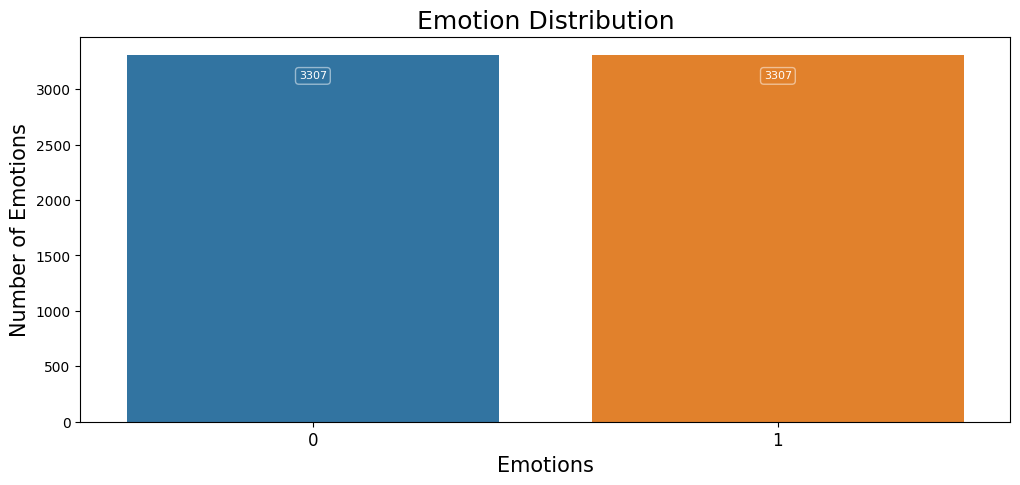

In [14]:
plot_data_distribution(senitment_df,'sentiment')

Word: নাটক, Frequency: 1078
Word: ভালো, Frequency: 1025
Word: অনেক, Frequency: 861
Word: অসাধারণ, Frequency: 712
Word: সুন্দর, Frequency: 586
Word: ভাই, Frequency: 471
Word: খুব, Frequency: 461
Word: একটা, Frequency: 454
Word: নিশো, Frequency: 391
Word: টা, Frequency: 326
Word: ভাল, Frequency: 289
Word: লাগলো, Frequency: 270
Word: সেরা, Frequency: 241
Word: আর, Frequency: 235
Word: ধন্যবাদ, Frequency: 232
Word: আমার, Frequency: 225
Word: এই, Frequency: 224
Word: নামাজের, Frequency: 207
Word: নামাজ, Frequency: 202
Word: জন্য, Frequency: 196
Word: লাগছে, Frequency: 187
Word: এক, Frequency: 185
Word: নাটকের, Frequency: 170
Word: অসাধারন, Frequency: 156
Word: সব, Frequency: 149
Word: এর, Frequency: 145
Word: কে, Frequency: 140
Word: নাটকটা, Frequency: 132
Word: না, Frequency: 131
Word: একটি, Frequency: 130
Word: কিছু, Frequency: 124
Word: অভিনয়, Frequency: 122
Word: কথায়, Frequency: 120
Word: ও, Frequency: 120
Word: উপহার, Frequency: 117
Word: কথা, Frequency: 117
Word: দেখে, Frequency: 116

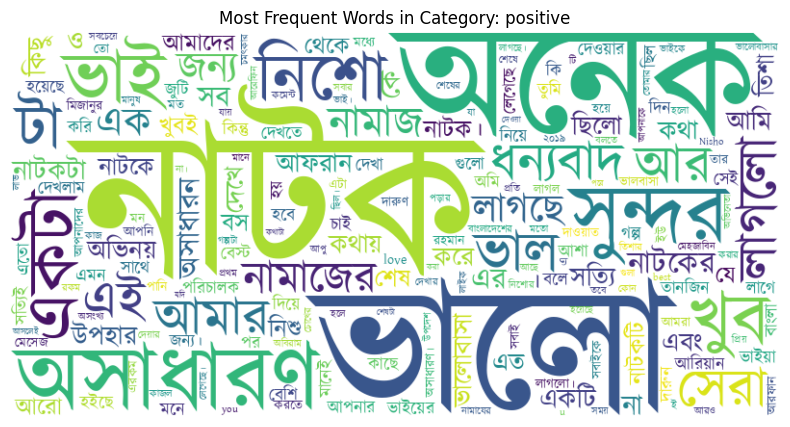

In [29]:
plot_most_frequent_words(senitment_df,'text','category', 'positive')

In [34]:
senitment_df['cleaned_text'] = senitment_df['text'].apply(cleaning_raw_text)

Word: নাটক, Frequency: 1078
Word: ভালো, Frequency: 1025
Word: অনেক, Frequency: 861
Word: অসাধারণ, Frequency: 712
Word: সুন্দর, Frequency: 586
Word: ভাই, Frequency: 471
Word: খুব, Frequency: 461
Word: একটা, Frequency: 454
Word: নিশো, Frequency: 391
Word: টা, Frequency: 326
Word: ভাল, Frequency: 289
Word: লাগলো, Frequency: 270
Word: সেরা, Frequency: 241
Word: আর, Frequency: 235
Word: ধন্যবাদ, Frequency: 232
Word: আমার, Frequency: 225
Word: এই, Frequency: 224
Word: নামাজের, Frequency: 207
Word: নামাজ, Frequency: 202
Word: জন্য, Frequency: 196
Word: লাগছে, Frequency: 187
Word: এক, Frequency: 185
Word: নাটকের, Frequency: 170
Word: অসাধারন, Frequency: 156
Word: সব, Frequency: 149
Word: এর, Frequency: 145
Word: কে, Frequency: 140
Word: নাটকটা, Frequency: 132
Word: না, Frequency: 131
Word: একটি, Frequency: 130
Word: কিছু, Frequency: 124
Word: অভিনয়, Frequency: 122
Word: কথায়, Frequency: 120
Word: ও, Frequency: 120
Word: উপহার, Frequency: 117
Word: কথা, Frequency: 117
Word: দেখে, Frequency: 116

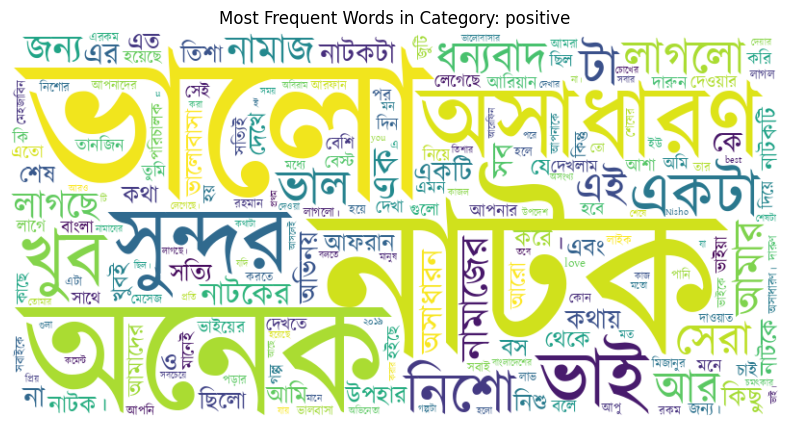

In [35]:
plot_most_frequent_words(senitment_df,'text','category', 'positive')

### Check rasism data

In [41]:
racism_df = load_json_data(data_dir)
racism_df

,category,cleanText
0,0.0,ইনিই হচ্ছেন ভারতের প্রতিরক্ষামন্ত্রী মনোহর পা...
1,1.0,রেন্ডিয়াকে পৃথীবির মানচিএ থেকে মুচে ফেলতে হবে
2,1.0,এই মালাউনরা বাংগালিদের সাফল্য দেখে হিংসা করে ব...
3,0.0,আমরা বলতে কারা ভারত তাইতো
4,1.0,পাকিস্তান আমার বাল
...,...,...
2881,1.0,এইটা কী তরবাপের দেশ নাকী জামনেচায় তাকরবি তদের ...
2882,1.0,মালাউনেরা বাংলাদেশে এতো ঘন ঘন কেনো আসে
2883,1.0,শিব সম্পূর্ণ নগ্ন হয়ে ঋষিদের স্ত্রীদের পিছনে দ...
2884,1.0,তুই তো নাস্তিক সেটা আমরা সবাই জানি তুই তো আরো ...


In [42]:
racism_df.rename(columns={'category':'label'},inplace=True)

In [43]:
racism_df.head()

,label,cleanText
0,0.0,ইনিই হচ্ছেন ভারতের প্রতিরক্ষামন্ত্রী মনোহর পা...
1,1.0,রেন্ডিয়াকে পৃথীবির মানচিএ থেকে মুচে ফেলতে হবে
2,1.0,এই মালাউনরা বাংগালিদের সাফল্য দেখে হিংসা করে ব...
3,0.0,আমরা বলতে কারা ভারত তাইতো
4,1.0,পাকিস্তান আমার বাল


In [44]:
racism_category = {1.0:"racism",0.0:"not racism"}
racism_df['category'] = racism_df['label'].map(racism_category)
racism_df.head()

,label,cleanText,category
0,0.0,ইনিই হচ্ছেন ভারতের প্রতিরক্ষামন্ত্রী মনোহর পা...,not racism
1,1.0,রেন্ডিয়াকে পৃথীবির মানচিএ থেকে মুচে ফেলতে হবে,racism
2,1.0,এই মালাউনরা বাংগালিদের সাফল্য দেখে হিংসা করে ব...,racism
3,0.0,আমরা বলতে কারা ভারত তাইতো,not racism
4,1.0,পাকিস্তান আমার বাল,racism


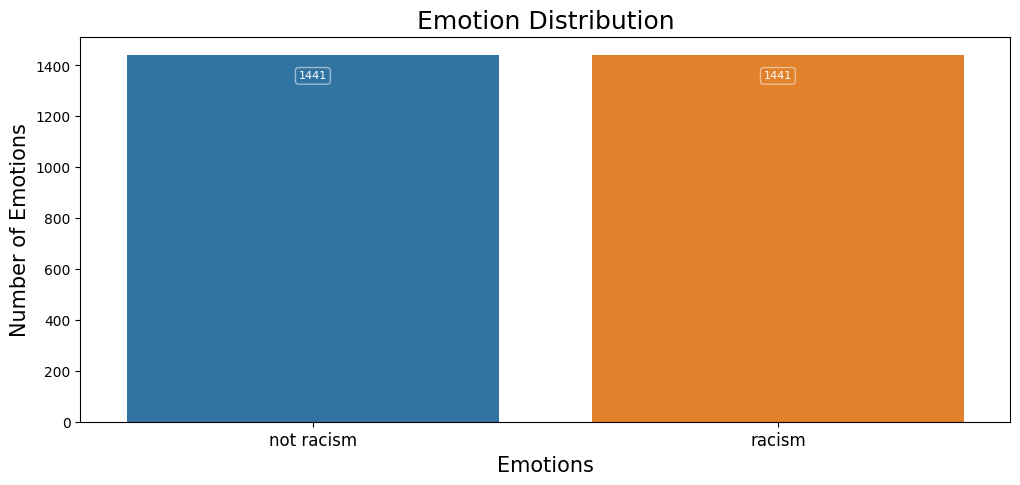

In [45]:
plot_data_distribution(racism_df,'category')

Word: করে, Frequency: 329
Word: না, Frequency: 293
Word: আর, Frequency: 282
Word: মালাউন, Frequency: 214
Word: ভারত, Frequency: 213
Word: ভারতের, Frequency: 189
Word: এই, Frequency: 165
Word: বাচ্চা, Frequency: 164
Word: তোদের, Frequency: 164
Word: কে, Frequency: 152
Word: কি, Frequency: 143
Word: দেশ, Frequency: 141
Word: থেকে, Frequency: 135
Word: তো, Frequency: 131
Word: মালাউনের, Frequency: 123
Word: মুসলিম, Frequency: 121
Word: ও, Frequency: 120
Word: আমাদের, Frequency: 116
Word: হিন্দু, Frequency: 110
Word: পাকিস্তান, Frequency: 109
Word: হয়, Frequency: 108
Word: ।, Frequency: 108
Word: সব, Frequency: 104
Word: জন্য, Frequency: 103
Word: একটা, Frequency: 102
Word: তোর, Frequency: 102
Word: যে, Frequency: 97
Word: কোন, Frequency: 96
Word: হবে, Frequency: 90
Word: এর, Frequency: 90
Word: খানকির, Frequency: 89
Word: তাদের, Frequency: 89
Word: আছে, Frequency: 88
Word: কিছু, Frequency: 88
Word: তোরা, Frequency: 88
Word: সাথে, Frequency: 87
Word: ধর্ম, Frequency: 85
Word: কথা, Frequenc

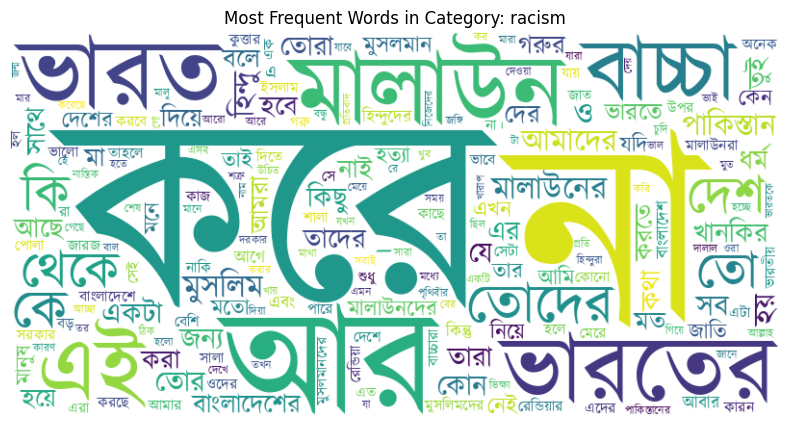

In [46]:
plot_most_frequent_words(racism_df,'cleanText','category', 'racism')

In [47]:
racism_df['cleaned_text'] = racism_df['cleanText'].apply(cleaning_raw_text)

Word: না, Frequency: 340
Word: মালাউন, Frequency: 218
Word: ভারত, Frequency: 215
Word: ভারতের, Frequency: 194
Word: বাচ্চা, Frequency: 179
Word: তোদের, Frequency: 170
Word: দেশ, Frequency: 147
Word: মুসলিম, Frequency: 125
Word: মালাউনের, Frequency: 123
Word: পাকিস্তান, Frequency: 111
Word: হিন্দু, Frequency: 110
Word: নাই, Frequency: 97
Word: তোরা, Frequency: 91
Word: খানকির, Frequency: 90
Word: সাথে, Frequency: 89
Word: ধর্ম, Frequency: 86
Word: কথা, Frequency: 85
Word: করা, Frequency: 80
Word: মা, Frequency: 74
Word: হয়ে, Frequency: 72
Word: বলে, Frequency: 72
Word: গরুর, Frequency: 69
Word: মত, Frequency: 69
Word: বাংলাদেশের, Frequency: 69
Word: দের, Frequency: 67
Word: দিয়ে, Frequency: 66
Word: ভারতে, Frequency: 62
Word: মুসলমান, Frequency: 61
Word: মালাউনদের, Frequency: 60
Word: মনে, Frequency: 59
Word: মানুষ, Frequency: 58
Word: নেই, Frequency: 58
Word: জাতি, Frequency: 57
Word: দেশের, Frequency: 57
Word: মতো, Frequency: 56
Word: হত্যা, Frequency: 53
Word: হিন্দুদের, Frequency: 5

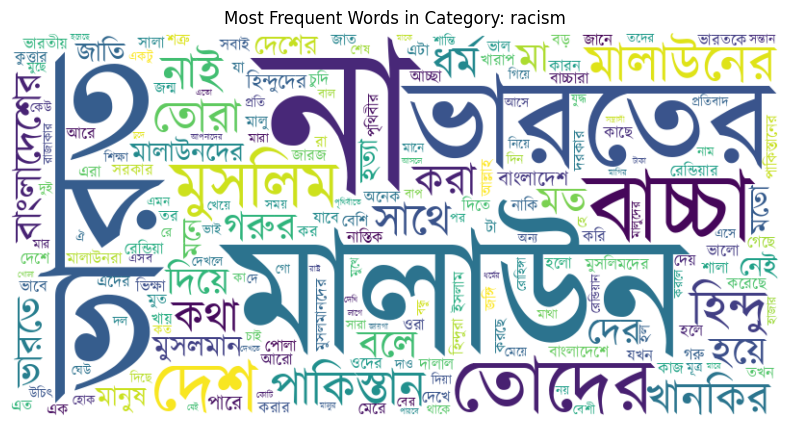

In [48]:
plot_most_frequent_words(racism_df,'cleaned_text','category', 'racism')

In [49]:
racism_df.head()

,label,cleanText,category,cleaned_text
0,0.0,ইনিই হচ্ছেন ভারতের প্রতিরক্ষামন্ত্রী মনোহর পা...,not racism,ইনিই হচ্ছেন ভারতের প্রতিরক্ষামন্ত্রী মনোহর পা...
1,1.0,রেন্ডিয়াকে পৃথীবির মানচিএ থেকে মুচে ফেলতে হবে,racism,রেন্ডিয়াকে পৃথীবির মানচিএ মুচে ফেলতে
2,1.0,এই মালাউনরা বাংগালিদের সাফল্য দেখে হিংসা করে ব...,racism,মালাউনরা বাংগালিদের সাফল্য দেখে হিংসা বাহির দে...
3,0.0,আমরা বলতে কারা ভারত তাইতো,not racism,বলতে কারা ভারত তাইতো
4,1.0,পাকিস্তান আমার বাল,racism,পাকিস্তান বাল


In [54]:
show_random_data(racism_df,'cleaned_text',20)

100%|████████████████████████████████████████| 20/20 [00:00<00:00, 13635.58it/s]

আজকে ৫ লক্ষ পেন্ডিয়ান বাংলাদেশে রোজগার তোদের খাওয়াচ্ছে
_________________________________
মাগিরে কুত্তা দিয়ে চুদি
_________________________________
বাংলাদেশে সামান্য পাতা পুড়ানুকে কেনদ্র উলটপালট ভারতে শত শত সমুসলিম সরকারের নির্দেশে হত্যা করছে পতিবাদ নাই বাংলাদেশের কুত্তারা সাহবাগে ছিতকার করছে দেখছেনা শুনছে না
_________________________________
মালু খানকির পোলাদের জবাই করা
_________________________________
তবুও ভারতে মুসলমান কুকুরের মতো বাড়ছে
_________________________________
মূর্তিকে প্রতিদিন গোমূত্র দিয়ে গোসল করান দেখবেন আল্লাহ আরো জ্ঞান বাড়িয়ে দিবে
_________________________________
কাশ্মীর সীমান্তে স্বাধীনতাকামীদের সাথে দখলদার ভারতীয় বাহিনীর সংঘর্ষ তিন দখলদার ভারতীয় সন্ত্রাসী হত্যা আপনাদের লেখা আরো সংযত হওয়া জরুরী স্বাধীনতাকামীদের সন্ত্রাসী বলেন
_________________________________
আরে ভাই খানকির পোলা আইছে আমগো সেনাবাহিনী নিতে এটা দিলেতো অস্তিত্বই বিলিন হয়ে যাবে
_________________________________
কুকুরের বাচ্চারা একটু পরেই বলবে এতে জামায়াত শিবিরের হাত
_________________________________
তদে

In [58]:
racism_df.dropna(inplace=True)

In [59]:
racism_df.isnull().sum()

label           0
cleanText       0
category        0
cleaned_text    0
dtype: int64

In [60]:
racism_df['label'] = racism_df['label'].astype('int')

In [64]:
racism_df[['category','cleaned_text','label']].to_csv('DATA/sentiment_racism.csv')

In [65]:
racism_df.shape

(2882, 4)